### Variant Analysis

Project Overview:

In this program, you have the ability to compare different virus/genomes to eachother in multiple different ways.

Abilities:
1. Genomic Stability:
    Compute GC Content (%) and Molecular Weight.
2. Protein Analysis:
    Translate DNA to Protein and calculate Amino Acid frequencies.
3. Visualization:
    Compare variants using seaborn bar charts and heatmaps

In [ ]:
from Bio import Entrez, SeqIO
from Bio.SeqUtils import gc_fraction, molecular_weight
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary with varient names and file handles

files = { }

while True:
    name=input('Enter the name of variant/genome:\n>')
    file=input('Enter the file name of variant/genome (Must be a fasta file):\n>')
    while str(file[-6:])!='.fasta':
        file=input('Error! (Must be a fasta file)\nPlease reenter:\n>')
    files[name]=file
    iterate=input('Would you like to enter another? (Y/N)\n>')
    if iterate!='Y':
        break



In [3]:
data=[]

# For loop to analyze each varient and create dataframe
for variant, filename in files.items():
    try:
        record=SeqIO.read(filename,"fasta")
    except FileNotFoundError:
        print(f'Filename ({filename}) is incorrect, please restart and correct')

    # Calculate GC Content (Genomic Stability) and Molecular Weight
    gc_percentage = gc_fraction(record.seq) * 100
    mol_weight = molecular_weight(record.seq, seq_type="DNA")

    # Get sequence length
    length = len(record.seq)

    # Translate DNA to Protein
    proteinseq = record.seq.translate()

    # Append to data list
    data.append({
        "variant":variant,
        "gc_percentage":gc_percentage,
        "mol_weight":mol_weight,
        "length":length,
        "proteinseq":str(proteinseq)
    })

# Create a Pandas dataframe from processed data
df = pd.DataFrame(data)
df

c:\Users\colin\OneDrive\Desktop\Coding\Project #1\.venv\Lib\site-packages\Bio\Seq.py:2877: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,variant,gc_percentage,mol_weight,length,proteinseq
0,Alpha,37.944810,9.205601e+06,29788,TNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTS...
1,Delta,37.964144,9.205126e+06,29786,SISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSI...
2,Omicron,37.980592,9.203601e+06,29781,TNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTS...


In [4]:
# Create list to store dictionaries of counts for each varient
aa_data=[]

# Loop through each variant in the DataFrame
for index,row in df.iterrows():
    protein=row['proteinseq']
    variant_name=row['variant']

    # Initialize Dictionary with varient name
    counts={}
    counts["Variant"] = variant_name

    # Count frequency of each amino acid in sequence
    for amino_acid in protein:
        counts[amino_acid]=counts.get(amino_acid,0)+1 
    aa_data.append(counts)


In [5]:
# Create a Pandas Dataframe containing all amino acid counts per varient
aa_df=pd.DataFrame(aa_data)
aa_df=aa_df.set_index('Variant')
aa_df=aa_df.fillna(0)

# Drop stop codons to clean up dataframe
aa_df=aa_df.drop(columns='*')

aa_df

,T,N,Q,L,S,I,C,R,V,F,K,A,H,Y,D,P,G,E,W,M
Variant,,,,,,,,,,,,,,,,,,,,
Alpha,674,466,327,895,800,435,608,541,549,587,417,392,317,511,311,303,419,266,247,123
Delta,672,464,328,893,798,437,610,542,550,590,417,391,315,510,310,304,421,266,249,124
Omicron,677,470,324,882,811,436,634,554,550,587,403,377,332,506,289,288,393,270,259,116


## 3. Comparative GC Content Visualization
This visualization compares the GC content across variants. Through this we can understand that despite specific protein mutations, the overall stability of the genome is conserved.

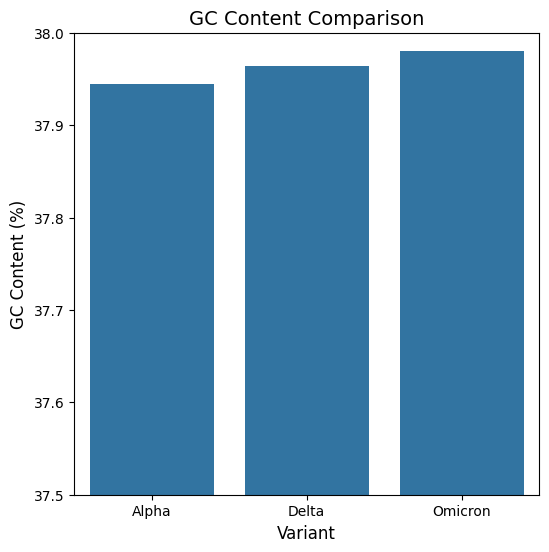

In [6]:
## Seaborn barplot to compare GC content percentages across variants

plt.figure(figsize=(6,6))
sns.barplot(x='variant',y='gc_percentage',data=df)
plt.title("GC Content Comparison", fontsize=14)
plt.ylabel("GC Content (%)", fontsize=12)
plt.xlabel("Variant", fontsize=12)
plt.ylim(37.5,38)

plt.show()

## 4. Comparison of Genomic Dimensions
Here, I visualize the comparison of physical size of each genome using previously calculated molecular mass and nucleotide sequence length. Through this we observe that while all variants are structurally similar, there are slight variances in mass and length corresponding with specific mutational profiles.

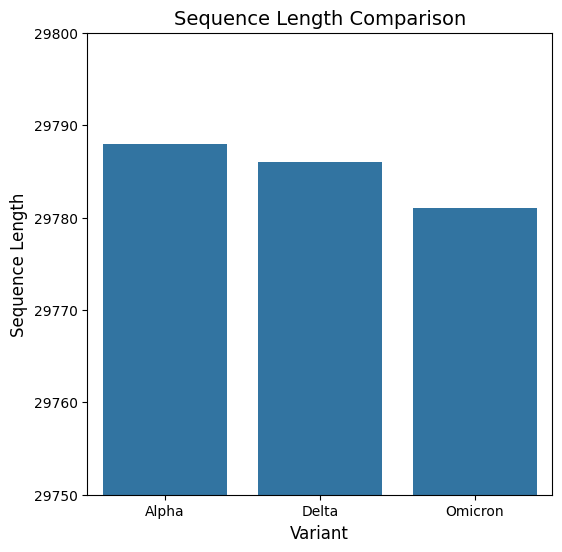

In [7]:
## Seaborn barplot to compare sequence length across variants

plt.figure(figsize=(6,6))
sns.barplot(x='variant',y='length',data=df)
plt.title("Sequence Length Comparison", fontsize=14)
plt.ylabel("Sequence Length", fontsize=12)
plt.xlabel("Variant", fontsize=12)
plt.ylim(29750,29800)

plt.show()

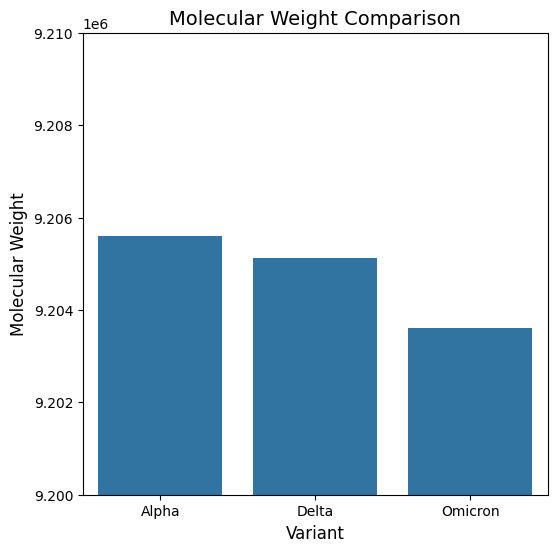

In [8]:
## Seaborn barplot to sequence molecular weight across variants

plt.figure(figsize=(6,6))
sns.barplot(x='variant',y='mol_weight',data=df)
plt.title("Molecular Weight Comparison", fontsize=14)
plt.ylabel("Molecular Weight", fontsize=12)
plt.xlabel("Variant", fontsize=12)
plt.ylim(9.20e6, 9.21e6)

plt.show()

## 5. Protein Analysis: Amino Acid Frequency
By counting the frequency of each amino acid, we can observe shifts in the composition.

Darker blue indicates a higher frequency of specific amino acids. Difference between rows highlight where mutations have altered the protein structure.

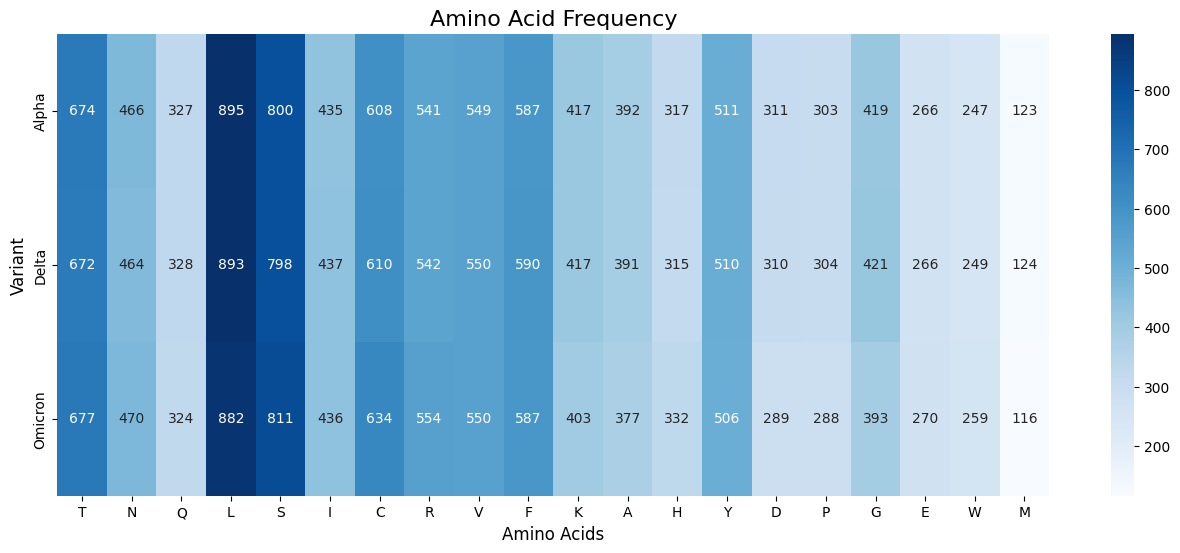

In [9]:
## Seaborn heatmap to compare amino acid frequencies across variants

plt.figure(figsize=(16,6))
sns.heatmap(aa_df, cmap="Blues", annot=True, fmt='g')
plt.title("Amino Acid Frequency", fontsize=16)
plt.xlabel("Amino Acids", fontsize=12)
plt.ylabel("Variant", fontsize=12)

plt.show()